# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

# 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

In [8]:
#卷積層1與池化層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層3與池化層3

In [13]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層4與池化層4

In [15]:
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())


In [17]:
#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [18]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [21]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 14s 385us/step - loss: 1.6056 - acc: 0.4020 - val_loss: 1.2889 - val_acc: 0.5188
Epoch 2/12
37500/37500 [==============================] - 8s 203us/step - loss: 1.1489 - acc: 0.5850 - val_loss: 1.0164 - val_acc: 0.6407
Epoch 3/12
37500/37500 [==============================] - 8s 210us/step - loss: 0.9233 - acc: 0.6706 - val_loss: 0.8927 - val_acc: 0.6898
Epoch 4/12
37500/37500 [==============================] - 8s 213us/step - loss: 0.7647 - acc: 0.7309 - val_loss: 0.8556 - val_acc: 0.7041
Epoch 5/12
37500/37500 [==============================] - 8s 207us/step - loss: 0.6521 - acc: 0.7691 - val_loss: 0.8204 - val_acc: 0.7163
Epoch 6/12
37500/37500 [==============================] - 8s 203us/step - loss: 0.5333 - acc: 0.8115 - val_loss: 0.8627 - val_acc: 0.7188
Epoch 7/12
37500/37500 [==============================] - 8s 214us/step - loss: 0.4301 - acc: 0.8456 - val_loss: 0.8574 -

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

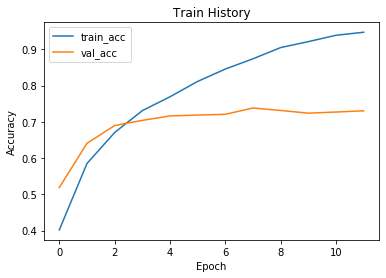

In [24]:
show_train_history('acc','val_acc')

In [25]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 139us/step

accuracy= 0.7266


#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 建立模型

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [27]:
model = Sequential()

In [28]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

#### 不同於範例的結構, 在卷積層後面多了Dropout避免 Overfitting, 卷積只做了兩層32、64(32、64、128、256), 且全連接層從2層512改成 1層1024, 並Dropout

In [31]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [32]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

作業:<br>
請分別選用 "MSE", "binary _crossentropy"<br>
查看Train/test accurancy and loss rate

In [33]:
import copy
model_MSE = copy.deepcopy(model)
model_binary_CE = copy.deepcopy(model)

model_MSE.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model_binary_CE.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

C:\Users\tony8\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [34]:
print("MSE Model Training...")
print()
train_history_MSE = model_MSE.fit(x_img_train_normalize, y_label_train_OneHot,
                                  validation_split=0.25, 
                                  epochs=12, batch_size=128, verbose=1)


print("Binary CrossEntropy Model Training...")
print()
train_history_binary_CE = model_binary_CE.fit(x_img_train_normalize, y_label_train_OneHot,
                                  validation_split=0.25, 
                                  epochs=12, batch_size=128, verbose=1)

MSE Model Training...

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 9s 230us/step - loss: 0.0907 - acc: 0.0962 - val_loss: 0.0900 - val_acc: 0.1114
Epoch 2/12
37500/37500 [==============================] - 7s 200us/step - loss: 0.0903 - acc: 0.1025 - val_loss: 0.0899 - val_acc: 0.1254
Epoch 3/12
37500/37500 [==============================] - 8s 200us/step - loss: 0.0901 - acc: 0.1110 - val_loss: 0.0898 - val_acc: 0.1366
Epoch 4/12
37500/37500 [==============================] - 9s 228us/step - loss: 0.0900 - acc: 0.1183 - val_loss: 0.0897 - val_acc: 0.1438
Epoch 5/12
37500/37500 [==============================] - 8s 206us/step - loss: 0.0898 - acc: 0.1206 - val_loss: 0.0896 - val_acc: 0.1514
Epoch 6/12
37500/37500 [==============================] - 8s 204us/step - loss: 0.0897 - acc: 0.1287 - val_loss: 0.0896 - val_acc: 0.1585
Epoch 7/12
37500/37500 [==============================] - 8s 200us/step - loss: 0.0896 - acc: 0.138

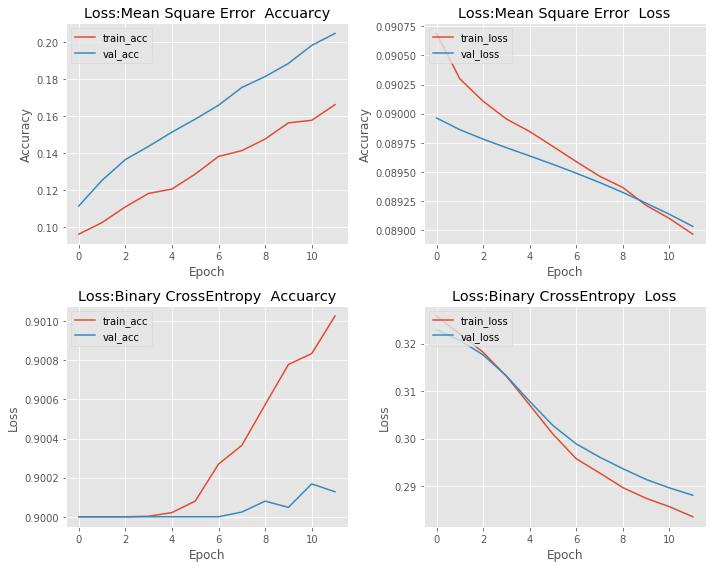

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


plt.subplot(2,2,1)
plt.plot(train_history_MSE.history['acc'])
plt.plot(train_history_MSE.history['val_acc'])
plt.title('Loss:Mean Square Error  Accuarcy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(train_history_MSE.history['loss'])
plt.plot(train_history_MSE.history['val_loss'])
plt.title('Loss:Mean Square Error  Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')


plt.subplot(2,2,3)
plt.plot(train_history_binary_CE.history['acc'])
plt.plot(train_history_binary_CE.history['val_acc'])
plt.title('Loss:Binary CrossEntropy  Accuarcy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')

plt.subplot(2,2,4)
plt.plot(train_history_binary_CE.history['loss'])
plt.plot(train_history_binary_CE.history['val_loss'])
plt.title('Loss:Binary CrossEntropy  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')


plt.tight_layout()
plt.show()

In [36]:
scores = model_MSE.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('MSE Accuracy=',scores[1])

10000/10000 [==============================] - 1s 134us/step

MSE Accuracy= 0.204


In [37]:
scores = model_binary_CE.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('Binary CrossEntropy Accuracy=',scores[1])

10000/10000 [==============================] - 1s 141us/step

Binary CrossEntropy Accuracy= 0.9001799768447876
